# Ejercicio 3: Estimacion Gaussiana

a) Descargue los datos de: [Gaussian Data](https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv)

b) Utilice la siguiente distribución a priori uniforme:
$\pi(\mu, \sigma) = \begin{cases} 
                    1 & \text{si } 3 \leq \mu \leq 5, \ 0.5 \leq \sigma \leq 3.5 \\
                    0 & \text{si otro caso}
                  \end{cases}
                  \quad (8.55)$

c) Escriba la función de likelihood Gaussiana.
$L(x|\mu, \sigma) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(\mu-x_i)^2}{2\sigma^2}}
\quad (8.56)$

d) Calcule el logaritmo de la distribución posterior.
$\ln(P(\mu, \sigma|x)) \sim \ln(L(x|\mu, \sigma)\pi(\mu, \sigma))
\quad (8.57)$

Dado que la distribución encontrada no está normalizada, la relación que existe es de proporcionalidad.

e) Use el algoritmo de Metrópolis para realizar el muestreo de $\ln(P(\mu, \sigma|x))$ con $N = 2 \times 10^4$ eventos.

f) Estime el mejor valor de los parámetros del modelo ($\hat{\mu}$, $\hat{\sigma}$).

g) Encuentre los errores $\sigma^+$ y $\sigma^-$ de los parámetros en un intervalo de confianza del $CL = 68\%.$


# Solucion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
data = pd.read_csv('Gaussiano.csv',encoding='UTF-8',header=0,delimiter=';')

In [3]:
def prior_distribution(mu, sigma):
    if 3 <= mu <= 5 and 0.5 <= sigma <= 3.5:
        return 1
    else:
        return 0

In [4]:
def likelihood(x, mu, sigma):
    N = len(x)
    exponent = -0.5 * np.sum(np.square((x - mu) / sigma))
    normalization = (2 * np.pi * np.square(sigma))**(-N / 2)
    return normalization * np.exp(exponent)

In [5]:
def posterior_distribution(x, mu, sigma):
    prior = prior_distribution(mu, sigma)
    likelihood_value = likelihood(x, mu, sigma)
    return np.log(prior * likelihood_value)

In [6]:
def metropolis_hastings(x, initial_mu, initial_sigma, num_samples):
    samples = []
    current_mu = initial_mu
    current_sigma = initial_sigma

    for _ in range(num_samples):
        # Generate proposal values
        proposal_mu = np.random.normal(current_mu, 0.1)
        proposal_sigma = np.random.normal(current_sigma, 0.1)

        # Calculate acceptance ratio
        acceptance_ratio = np.exp(
            posterior_distribution(x, proposal_mu, proposal_sigma) -
            posterior_distribution(x, current_mu, current_sigma))

        # Accept or reject the proposal
        if acceptance_ratio >= 1 or np.random.uniform() < acceptance_ratio:
            current_mu = proposal_mu
            current_sigma = proposal_sigma

        # Save the current parameter values
        samples.append((current_mu, current_sigma))

    return samples


In [7]:
# Estimate the best values of the model parameters
num_samples = 20000
samples = metropolis_hastings(data['x'], 4, 1, num_samples)
best_mu, best_sigma = np.mean(samples, axis=0)

# Calculate the errors of the parameters within a 68% confidence interval
quantiles = np.quantile(samples, [0.16, 0.84], axis=0)
error_mu = (quantiles[1][0] - quantiles[0][0]) / 2
error_sigma = (quantiles[1][1] - quantiles[0][1]) / 2

/tmp/ipykernel_200736/4284560055.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(prior * likelihood_value)


In [8]:
print("Best value of mu:", best_mu)
print("Best value of sigma:", best_sigma)
print("Error of mu within a 68% confidence interval:", error_mu)
print("Error of sigma within a 68% confidence interval:", error_sigma)

Best value of mu: 4.012876629036427
Best value of sigma: 1.8426831103212395
Error of mu within a 68% confidence interval: 0.18758087110569122
Error of sigma within a 68% confidence interval: 0.132228134964395


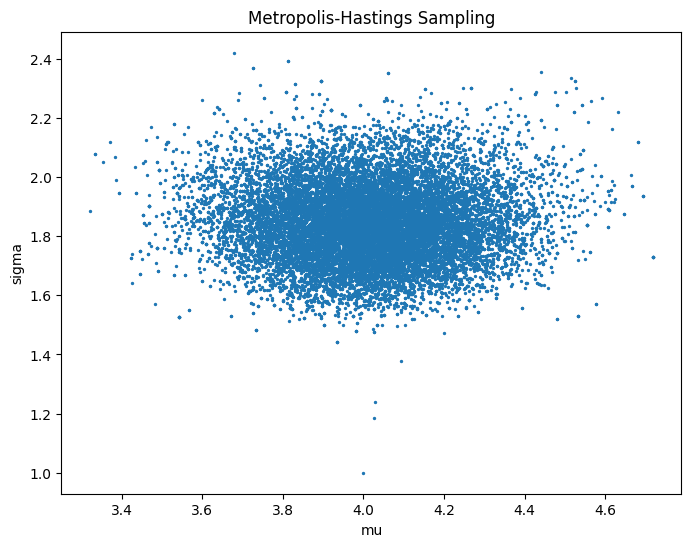

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*samples), s=2)
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Metropolis-Hastings Sampling')
plt.show()

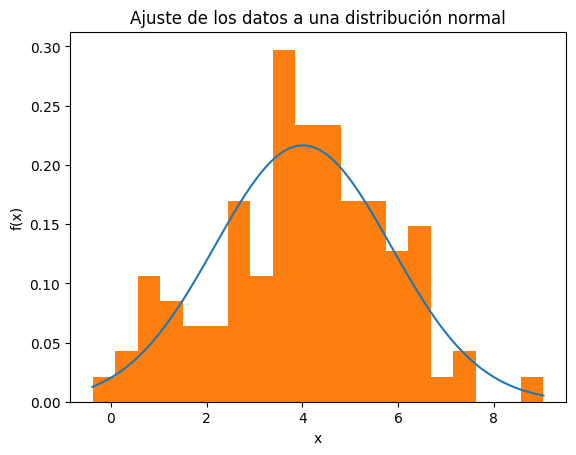

In [10]:
x = np.linspace(data.min(), data.max(), 100)
plt.plot(x, norm.pdf(x, best_mu, best_sigma))
plt.hist(data, density=True, bins=20)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Ajuste de los datos a una distribución normal')
plt.show()